# Data Import

In [1]:
#Import necessary packages
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
# Import dataset
dfs = []
path = r'C:\Users\skama\Downloads\Capstone Project\Data'
for file in os.listdir(path):
    filepath = path + '\\' + file
    df = pd.read_json(filepath)
    dfs.append(df)
    
df = pd.concat(dfs, ignore_index = True)

In [3]:
#View full dataframe
df.head()

,review_id,user_id,business_id,r_stars,r_useful,r_funny,r_text,r_date,r_name,b_postal_code,b_latitude,b_longitude,b_is_open,b_attributes,b_categories,b_hours
0,58vpFFj3ZlGlQCH_k6mahg,cPcStFGBlk-6lWWsttIfVQ,JLixvCikc5JYGcnvaqHoJg,4,3,2,It's a basic speakeasy bar that's more low key...,1451950757000,21st Amendment at La Louisiane,70130,29.954530,-90.068650,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Nightlife, Bars","{'Thursday': '14:0-23:0', 'Friday': '14:0-23:0..."
1,xz4gfFrqKHPAag6hj3ZvdA,OY0lWSo1kw_B84JF89kAFQ,0-3kCit8mt8cCjiQXDyg8w,4,0,0,I really enjoy this mall. Its pretty much Del...,1311989748000,Christiana Mall,19702,39.677845,-75.650406,1,"{'BusinessParking': '{'garage': False, 'street...","Shopping Centers, Shopping","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
2,nN5J0ycMnnB8LJuxDz3UNw,T65MUTdDVeSQx4mQBSglNg,UuWNE12-HI-4UPilREGX5g,4,2,0,Just moved to the area and was really excited ...,1517529794000,Masami Japanese Steakhouse & Sushi Bar,19026,39.957203,-75.320765,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Restaurants, Sushi Bars, Japanese, Steakhouses","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,x1GRYaT-AsVLHNOvedkqZA,nGNRgylBjTdLFxe9RDlpnQ,EQ-TZ2eeD_E0BHuvoaeG5Q,5,0,0,Milktooth was such a unique experience. I had ...,1516906498000,Milktooth,46203,39.759169,-86.146494,1,"{'GoodForKids': 'True', 'Alcohol': 'u'full_bar...","Beer, Wine & Spirits, Cafes, Coffee & Tea, Res...","{'Monday': '10:0-15:0', 'Friday': '10:0-15:0',..."
4,fJvJlqBeDHQUgS973-A0zA,Wij12ziCKqNXo8MGiCLbmQ,diwwt5QBU3-Thig9SVlsOA,4,0,0,Wide variety of micro brews with great traditi...,1370156491000,Brew Brothers,89501,39.529562,-119.814565,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Bars, Nightlife, American (Traditional), Music...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


# Data Cleaning

In [4]:
#Limit dataset to random 30% (300,000 rows)
df1 = df.sample(n=300000)
df1.shape

(300000, 16)

In [5]:
#Remove uneeded columns: user_id, business_id, r_name, b_hours
reviews = df1.drop(labels = ['user_id', 'business_id', 'r_name', 'b_hours', 'b_attributes', 'b_categories'], axis = 1)
reviews.head()

,review_id,r_stars,r_useful,r_funny,r_text,r_date,b_postal_code,b_latitude,b_longitude,b_is_open
7034,OTd1oDXe1Zawe8VDta6-Gw,3,0,0,I tried Pomme Cafe last weekend as it's on my ...,1342622312000,63105,38.651459,-90.337816,0
841472,ebQGl-r5bR5zC1iZpbYw1Q,3,1,0,"The burger was good, but when the girl who wor...",1478980886000,33701,27.772607,-82.636790,0
700327,bG9dbZaDMr31nmEK2q41oQ,5,0,0,I ordered delivery from Pop's through UberEats...,1604438250000,63103,38.632230,-90.199484,1
199065,dinJy9miiFxPukaplXOctg,5,0,0,My sister recommended GB because I was looking...,1278430704000,70130,29.948039,-90.064975,1
431115,jF37xkQv5DfH-oth5i0X2A,3,0,0,Little tacky and not so clean place but food i...,1491156927000,85741,32.337013,-111.054214,1


In [6]:
#Clean date column and parse out Month & Day & Weekday
from datetime import datetime

cleaned_dates = []
weekday = []
yr = []
mnth = []
day = []
hour = []
minute = []
for d in reviews['r_date']:
    ts = int(d)

    date_string = datetime.fromtimestamp(ts/1000).strftime('%Y-%m-%d %H:%M:%S')
    new_date = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')
    
    yr.append(new_date.year)
    mnth.append(new_date.month)
    day.append(new_date.day)
    hour.append(new_date.hour)
    minute.append(new_date.minute)
    day_of_week = (new_date.weekday() + 1) % 7
    
    cleaned_dates.append(new_date)
    weekday.append(day_of_week)

reviews['r_date'] = cleaned_dates
reviews['Weekday'] = weekday
reviews['Year'] = yr
reviews['Month'] = mnth
reviews['Day'] = day
reviews['Hour'] = hour
reviews['Minute'] = minute

In [7]:
reviews.head()

,review_id,r_stars,r_useful,r_funny,r_text,r_date,b_postal_code,b_latitude,b_longitude,b_is_open,Weekday,Year,Month,Day,Hour,Minute
7034,OTd1oDXe1Zawe8VDta6-Gw,3,0,0,I tried Pomme Cafe last weekend as it's on my ...,2012-07-18 10:38:32,63105,38.651459,-90.337816,0,3,2012,7,18,10,38
841472,ebQGl-r5bR5zC1iZpbYw1Q,3,1,0,"The burger was good, but when the girl who wor...",2016-11-12 15:01:26,33701,27.772607,-82.636790,0,6,2016,11,12,15,1
700327,bG9dbZaDMr31nmEK2q41oQ,5,0,0,I ordered delivery from Pop's through UberEats...,2020-11-03 16:17:30,63103,38.632230,-90.199484,1,2,2020,11,3,16,17
199065,dinJy9miiFxPukaplXOctg,5,0,0,My sister recommended GB because I was looking...,2010-07-06 11:38:24,70130,29.948039,-90.064975,1,2,2010,7,6,11,38
431115,jF37xkQv5DfH-oth5i0X2A,3,0,0,Little tacky and not so clean place but food i...,2017-04-02 14:15:27,85741,32.337013,-111.054214,1,0,2017,4,2,14,15


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 7034 to 81222
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   review_id      300000 non-null  object        
 1   r_stars        300000 non-null  int64         
 2   r_useful       300000 non-null  int64         
 3   r_funny        300000 non-null  int64         
 4   r_text         300000 non-null  object        
 5   r_date         300000 non-null  datetime64[ns]
 6   b_postal_code  300000 non-null  object        
 7   b_latitude     300000 non-null  float64       
 8   b_longitude    300000 non-null  float64       
 9   b_is_open      300000 non-null  int64         
 10  Weekday        300000 non-null  int64         
 11  Year           300000 non-null  int64         
 12  Month          300000 non-null  int64         
 13  Day            300000 non-null  int64         
 14  Hour           300000 non-null  int64         
 15

# EDA

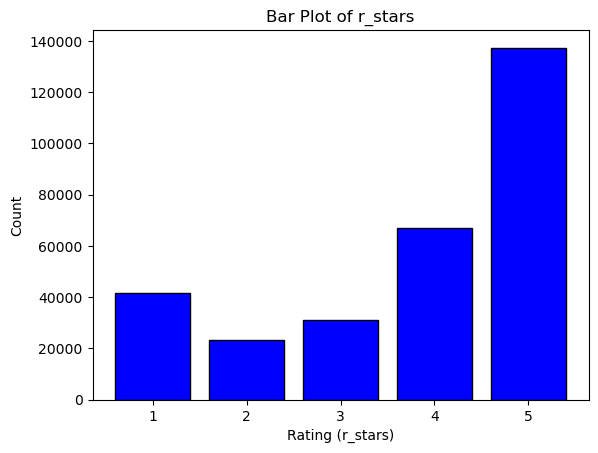

In [9]:
value_counts = reviews['r_stars'].value_counts().sort_index()
plt.bar(value_counts.index, value_counts.values, color='blue', edgecolor='black')
# Label the x and y axes
plt.xlabel('Rating (r_stars)')
plt.ylabel('Count')
# Set the title
plt.title('Bar Plot of r_stars')
# Show the plot
plt.show()

In [10]:
#Split r_text into list of words
reviews['r_length'] = reviews['r_text'].apply(lambda x: len(x.split()))

checklen = []
for i in range(5,1000,100):
    checklen.append(len(reviews[(reviews['r_length']>=i-100) & (reviews['r_length']<i)]))

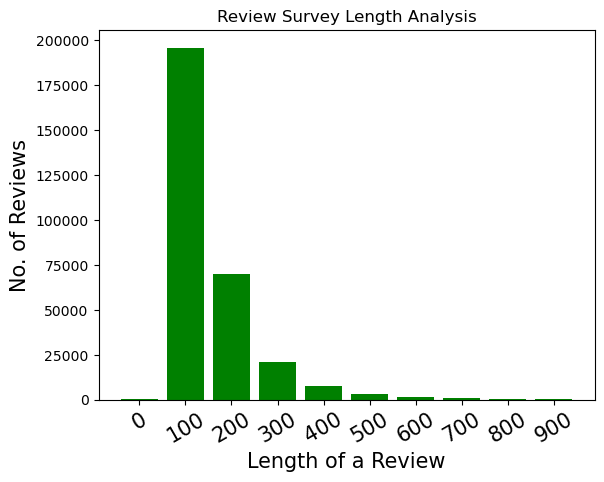

In [11]:
index = np.arange(len(checklen))
plt.bar(index, checklen, color='green')
plt.xlabel('Length of a Review', fontsize=15)
plt.ylabel('No. of Reviews', fontsize=15)
plt.xticks(index, range(0,1000,100), fontsize=15, rotation=30)
plt.title('Review Survey Length Analysis')
plt.show()

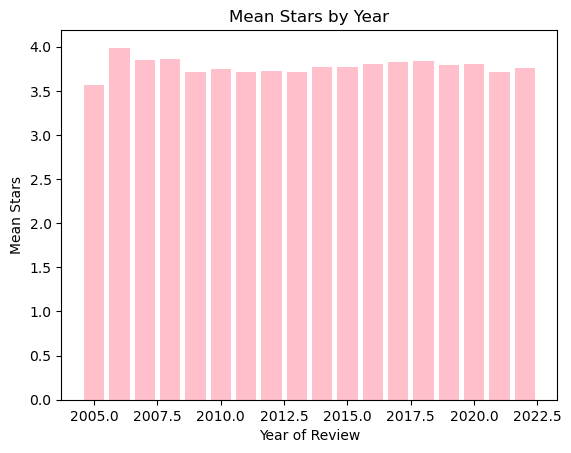

In [12]:
#Seasonality of r_stars - Year
reviews_year = reviews[['Year', 'r_stars']].groupby('Year').mean().reset_index()

plt.bar(reviews_year['Year'], reviews_year['r_stars'], color = 'pink')
plt.xlabel('Year of Review', fontsize=10)
plt.ylabel('Mean Stars', fontsize=10)
plt.title('Mean Stars by Year')
plt.show()

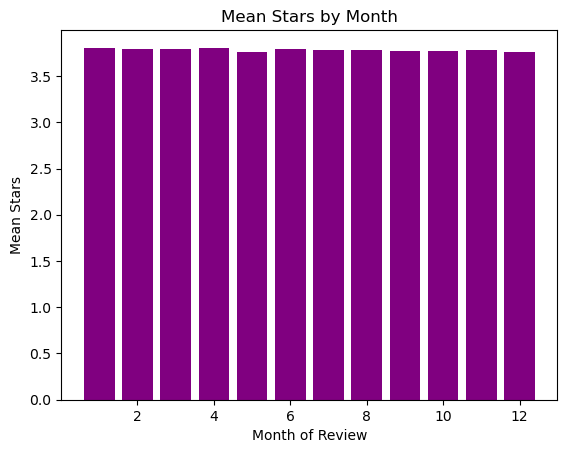

In [13]:
#Seasonality of r_stars - Month
reviews_year = reviews[['Month', 'r_stars']].groupby('Month').mean().reset_index()

plt.bar(reviews_year['Month'], reviews_year['r_stars'], color = 'purple')
plt.xlabel('Month of Review', fontsize=10)
plt.ylabel('Mean Stars', fontsize=10)
plt.title('Mean Stars by Month')
plt.show()

#### Sentiment Word Cloud 

In [ ]:
# Concatenate all the text in the 'r_text' column into a single string
text=" ".join(df['r_text'])

In [ ]:
# Build Word Cloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Define function for sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [ ]:
# Define function for word cloud creation
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [ ]:
# Apply sentiment analysis and create word clouds
df['sentiment'] = df['r_text'].apply(analyze_sentiment)

positive_text = " ".join(df[df['sentiment'] > 0]['r_text'])
negative_text = " ".join(df[df['sentiment'] < 0]['r_text'])

create_word_cloud(positive_text, 'Word Cloud of Positive Words')
create_word_cloud(negative_text, 'Word Cloud of Negative Words')

# Data Preprocessing

In [14]:
#Preprocessing packages & functions
import seaborn as sns
import sys 
from pylab import rcParams
import seaborn as sns
import dask.dataframe as dd
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import spacy
import regex as re

In [15]:
#download the stopwords list from the nltk package
nltk.download('stopwords')

#Download nltk punkt package to tokenize the text
nltk.download('punkt')

ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\skama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
#Function for Lower case conversion 
def lowercase(chunk):
    chunk['r_text'] = chunk['r_text'].str.lower()
    return chunk

# Function to remove stop words
def remove_stopwords(chunk):
    stop_words = set(stopwords.words('english'))
    chunk['r_text'] = chunk['r_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
    return chunk

# Function to remove HTML tags
def remove_html_tags(chunk):
    chunk['r_text'] = chunk['r_text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    return chunk

# Function to remove punctuation
def remove_punctuation(chunk):
    chunk['r_text'] = chunk['r_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    return chunk

# Function to remove special characters
def remove_special_characters(chunk):
    chunk['r_text'] = chunk['r_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
    return chunk

#Tokenization
def tokenize_text(chunk):
    # Tokenize each row in the 'r_text' column
    chunk['r_text'] = chunk['r_text'].apply(lambda x: word_tokenize(x))
    return chunk

#Stemming
def ps_stemmer(chunk):
    chunk['r_text'] = chunk['r_text'].apply(lambda x: [ps.stem(word) for word in x])
    return chunk

In [17]:
#%% Apply PreProcessing to Reviews df
chunk_size = 10000

In [18]:
# Convert the training pandas DataFrame 'df' to a Dask DataFrame 'ddf'
ddf = dd.from_pandas(reviews, npartitions=int(len(df) / chunk_size))

# Apply the function 'preprocess' to each partition of the Dask DataFrame 'ddf' to make every word lowercase
ddf = ddf.map_partitions(lowercase)

# Compute and collect the results to obtain a pandas DataFrame 'df_lowercase'
df_lowercase = ddf.compute()

df_lowercase.head()

,review_id,r_stars,r_useful,r_funny,r_text,r_date,b_postal_code,b_latitude,b_longitude,b_is_open,Weekday,Year,Month,Day,Hour,Minute,r_length
3,x1GRYaT-AsVLHNOvedkqZA,5,0,0,milktooth was such a unique experience. i had ...,2018-01-25 13:54:58,46203,39.759169,-86.146494,1,4,2018,1,25,13,54,99
4,fJvJlqBeDHQUgS973-A0zA,4,0,0,wide variety of micro brews with great traditi...,2013-06-02 03:01:31,89501,39.529562,-119.814565,1,0,2013,6,2,3,1,69
5,LFpaQzYkP5Pzm5lEjJpTRw,5,0,0,possibly the best breakfast sandwich ever. on...,2017-01-14 19:36:04,93101,34.414445,-119.690672,1,6,2017,1,14,19,36,16
11,1iIKj7NWc2zOvAWNDsZgQw,1,18,5,i would not recommend using alexander bourne o...,2014-06-11 13:14:54,70130,29.930281,-90.075168,1,3,2014,6,11,13,14,716
12,os7YxMz8IKrJq2wRtq1ccA,5,1,0,i love this place! a very cozy and fun neighbo...,2018-01-10 13:46:04,19147,39.940374,-75.145611,0,3,2018,1,10,13,46,35


In [19]:
# Convert the pandas DataFrame 'df_lowercase' to a Dask DataFrame 'ddf'
ddf = dd.from_pandas(df_lowercase, npartitions=int(len(df_lowercase) / chunk_size))

# Apply the function 'remove_html_tags' to each partition of the Dask DataFrame 'ddf'
ddf = ddf.map_partitions(remove_html_tags)

# Compute and collect the results to obtain a pandas DataFrame 'df_removehtml'
df_removehtml = ddf.compute()

df_removehtml.head()

C:\Users\skama\AppData\Local\Temp\ipykernel_29264\1335615472.py:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  chunk['r_text'] = chunk['r_text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
C:\Users\skama\AppData\Local\Temp\ipykernel_29264\1335615472.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['r_text'] = chunk['r_text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
C:\Users\skama\AppData\Local\Temp\ipykernel_29264\1335615472.py:14: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL

,review_id,r_stars,r_useful,r_funny,r_text,r_date,b_postal_code,b_latitude,b_longitude,b_is_open,Weekday,Year,Month,Day,Hour,Minute,r_length
3,x1GRYaT-AsVLHNOvedkqZA,5,0,0,milktooth was such a unique experience. i had ...,2018-01-25 13:54:58,46203,39.759169,-86.146494,1,4,2018,1,25,13,54,99
4,fJvJlqBeDHQUgS973-A0zA,4,0,0,wide variety of micro brews with great traditi...,2013-06-02 03:01:31,89501,39.529562,-119.814565,1,0,2013,6,2,3,1,69
5,LFpaQzYkP5Pzm5lEjJpTRw,5,0,0,possibly the best breakfast sandwich ever. on...,2017-01-14 19:36:04,93101,34.414445,-119.690672,1,6,2017,1,14,19,36,16
11,1iIKj7NWc2zOvAWNDsZgQw,1,18,5,i would not recommend using alexander bourne o...,2014-06-11 13:14:54,70130,29.930281,-90.075168,1,3,2014,6,11,13,14,716
12,os7YxMz8IKrJq2wRtq1ccA,5,1,0,i love this place! a very cozy and fun neighbo...,2018-01-10 13:46:04,19147,39.940374,-75.145611,0,3,2018,1,10,13,46,35


In [20]:
# Convert the pandas DataFrame 'df_removehtml' to a Dask DataFrame 'ddf'
ddf = dd.from_pandas(df_removehtml, npartitions=int(len(df_removehtml) / chunk_size))

# Apply the function 'remove_stopwords' to each partition of the Dask DataFrame 'ddf'
ddf = ddf.map_partitions(remove_stopwords)

# Compute and collect the results to obtain a pandas DataFrame 'df_stopwords'
df_stopwords = ddf.compute()

df_stopwords.head()

C:\Users\skama\AppData\Local\Temp\ipykernel_29264\1335615472.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['r_text'] = chunk['r_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


,review_id,r_stars,r_useful,r_funny,r_text,r_date,b_postal_code,b_latitude,b_longitude,b_is_open,Weekday,Year,Month,Day,Hour,Minute,r_length
3,x1GRYaT-AsVLHNOvedkqZA,5,0,0,milktooth unique experience. grilled cheese am...,2018-01-25 13:54:58,46203,39.759169,-86.146494,1,4,2018,1,25,13,54,99
4,fJvJlqBeDHQUgS973-A0zA,4,0,0,wide variety micro brews great traditional bre...,2013-06-02 03:01:31,89501,39.529562,-119.814565,1,0,2013,6,2,3,1,69
5,LFpaQzYkP5Pzm5lEjJpTRw,5,0,0,possibly best breakfast sandwich ever. biscuit...,2017-01-14 19:36:04,93101,34.414445,-119.690672,1,6,2017,1,14,19,36,16
11,1iIKj7NWc2zOvAWNDsZgQw,1,18,5,would recommend using alexander bourne patina ...,2014-06-11 13:14:54,70130,29.930281,-90.075168,1,3,2014,6,11,13,14,716
12,os7YxMz8IKrJq2wRtq1ccA,5,1,0,love place! cozy fun neighborhood bar. best ba...,2018-01-10 13:46:04,19147,39.940374,-75.145611,0,3,2018,1,10,13,46,35


In [21]:
# Convert the pandas DataFrame 'df_stopwords' to a Dask DataFrame 'ddf'
ddf = dd.from_pandas(df_stopwords, npartitions=int(len(df_stopwords) / chunk_size))

# Apply the function 'remove_punctuation' to each partition of the Dask DataFrame 'ddf'
ddf = ddf.map_partitions(remove_punctuation)

# Compute and collect the results to obtain a pandas DataFrame 'df_punct'
df_punct = ddf.compute()

df_punct.head()

C:\Users\skama\AppData\Local\Temp\ipykernel_29264\1335615472.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['r_text'] = chunk['r_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


,review_id,r_stars,r_useful,r_funny,r_text,r_date,b_postal_code,b_latitude,b_longitude,b_is_open,Weekday,Year,Month,Day,Hour,Minute,r_length
3,x1GRYaT-AsVLHNOvedkqZA,5,0,0,milktooth unique experience grilled cheese ama...,2018-01-25 13:54:58,46203,39.759169,-86.146494,1,4,2018,1,25,13,54,99
4,fJvJlqBeDHQUgS973-A0zA,4,0,0,wide variety micro brews great traditional bre...,2013-06-02 03:01:31,89501,39.529562,-119.814565,1,0,2013,6,2,3,1,69
5,LFpaQzYkP5Pzm5lEjJpTRw,5,0,0,possibly best breakfast sandwich ever biscuit ...,2017-01-14 19:36:04,93101,34.414445,-119.690672,1,6,2017,1,14,19,36,16
11,1iIKj7NWc2zOvAWNDsZgQw,1,18,5,would recommend using alexander bourne patina ...,2014-06-11 13:14:54,70130,29.930281,-90.075168,1,3,2014,6,11,13,14,716
12,os7YxMz8IKrJq2wRtq1ccA,5,1,0,love place cozy fun neighborhood bar best bart...,2018-01-10 13:46:04,19147,39.940374,-75.145611,0,3,2018,1,10,13,46,35


In [22]:
# Convert the pandas DataFrame 'df_punct' to a Dask DataFrame 'ddf'
ddf = dd.from_pandas(df_punct, npartitions=int(len(df_punct) / chunk_size))

# Apply the function 'tokenize_text' to each partition of the Dask DataFrame 'ddf'
ddf = ddf.map_partitions(tokenize_text)

# Compute and collect the results to obtain a pandas DataFrame 'df_tokenize'
df_tokenize=ddf.compute()   

df_tokenize.head()

C:\Users\skama\AppData\Local\Temp\ipykernel_29264\1335615472.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['r_text'] = chunk['r_text'].apply(lambda x: word_tokenize(x))


,review_id,r_stars,r_useful,r_funny,r_text,r_date,b_postal_code,b_latitude,b_longitude,b_is_open,Weekday,Year,Month,Day,Hour,Minute,r_length
3,x1GRYaT-AsVLHNOvedkqZA,5,0,0,"[milktooth, unique, experience, grilled, chees...",2018-01-25 13:54:58,46203,39.759169,-86.146494,1,4,2018,1,25,13,54,99
4,fJvJlqBeDHQUgS973-A0zA,4,0,0,"[wide, variety, micro, brews, great, tradition...",2013-06-02 03:01:31,89501,39.529562,-119.814565,1,0,2013,6,2,3,1,69
5,LFpaQzYkP5Pzm5lEjJpTRw,5,0,0,"[possibly, best, breakfast, sandwich, ever, bi...",2017-01-14 19:36:04,93101,34.414445,-119.690672,1,6,2017,1,14,19,36,16
11,1iIKj7NWc2zOvAWNDsZgQw,1,18,5,"[would, recommend, using, alexander, bourne, p...",2014-06-11 13:14:54,70130,29.930281,-90.075168,1,3,2014,6,11,13,14,716
12,os7YxMz8IKrJq2wRtq1ccA,5,1,0,"[love, place, cozy, fun, neighborhood, bar, be...",2018-01-10 13:46:04,19147,39.940374,-75.145611,0,3,2018,1,10,13,46,35


In [23]:
# Convert the pandas DataFrame 'df_tokenize' to a Dask DataFrame 'ddf'
ddf = dd.from_pandas(df_tokenize, npartitions=int(len(df_tokenize) / chunk_size))

# Apply the function 'ps_stemmer' to each partition of the Dask DataFrame 'ddf'
ps = PorterStemmer()
ddf = ddf.map_partitions(ps_stemmer)

# Compute and collect the results to obtain a pandas DataFrame 'df_stem'
df_stem = ddf.compute()

df_stem.head()

C:\Users\skama\AppData\Local\Temp\ipykernel_29264\1335615472.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['r_text'] = chunk['r_text'].apply(lambda x: [ps.stem(word) for word in x])


,review_id,r_stars,r_useful,r_funny,r_text,r_date,b_postal_code,b_latitude,b_longitude,b_is_open,Weekday,Year,Month,Day,Hour,Minute,r_length
3,x1GRYaT-AsVLHNOvedkqZA,5,0,0,"[milktooth, uniqu, experi, grill, chees, amaz,...",2018-01-25 13:54:58,46203,39.759169,-86.146494,1,4,2018,1,25,13,54,99
4,fJvJlqBeDHQUgS973-A0zA,4,0,0,"[wide, varieti, micro, brew, great, tradit, br...",2013-06-02 03:01:31,89501,39.529562,-119.814565,1,0,2013,6,2,3,1,69
5,LFpaQzYkP5Pzm5lEjJpTRw,5,0,0,"[possibl, best, breakfast, sandwich, ever, bis...",2017-01-14 19:36:04,93101,34.414445,-119.690672,1,6,2017,1,14,19,36,16
11,1iIKj7NWc2zOvAWNDsZgQw,1,18,5,"[would, recommend, use, alexand, bourn, patina...",2014-06-11 13:14:54,70130,29.930281,-90.075168,1,3,2014,6,11,13,14,716
12,os7YxMz8IKrJq2wRtq1ccA,5,1,0,"[love, place, cozi, fun, neighborhood, bar, be...",2018-01-10 13:46:04,19147,39.940374,-75.145611,0,3,2018,1,10,13,46,35


# Model Build

In [24]:
#pip install tensorflow scikeras scikit-learn

In [ ]:
#import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
import warnings
 
warnings.filterwarnings(action='ignore')

In [ ]:
#Re-join r_text field as sentences
rtext = []
for text in df_stem['r_text']:
    joined_text = ' '.join(text)
    rtext.append(joined_text)
    
df_stem['r_text'] = rtext

In [ ]:
df_stem['b_latitude'] = df_stem['b_latitude'].apply(np.int64)
df_stem['b_longitude'] = df_stem['b_longitude'].apply(np.int64)

In [ ]:
X = df_stem.drop(labels = ['review_id','r_stars', 'r_date'], axis = 1)
y = df_stem['r_stars']

X.shape, y.shape

In [ ]:
#Split data into training, testing, and validation sets with 80/20 split

#split 1 = Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Split 2 = Train & Validation Data 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_train.head()

In [ ]:
X_train.info()

In [ ]:
#Define Categorical Variables
Category = ['b_postal_code', 'Weekday', 'Year', 'Month']

In [ ]:
#Define Numerical Variables
Numerical = ['b_latitude', 'b_longitude', 'Day', 'Hour', 'Minute', 'r_useful', 'r_funny']

In [ ]:
#Apply Preprocessing = OneHotEncoder, StandardScaler, TruncatedSVD with DecisionTree Model

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), Category),
        ('tfidf', TfidfVectorizer(), 'r_text'),
        ('num', StandardScaler(), Numerical)
    ]
)

# Define the PCA and DecisionTreeClassifier pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components= 3)),  #pick components that explain 80% of the variation
    ('classifier', DecisionTreeClassifier())
])

# Train the model
model_pipeline.fit(X_train, y_train)

#predict
val_pred = model_pipeline.predict(X_val) 
test_pred = model_pipeline.predict(X_test) 

#Get accuracy score
val_acc = accuracy_score(y_val, val_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Validation Accuracy: {val_acc}")
print(f"Test Accuracy: {test_acc}")

In [ ]:
test_report = classification_report(y_test, test_pred)
print("Test Set Classification Report:\n", test_report)

In [ ]:
cm = confusion_matrix(y_test, test_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
#Apply Preprocessing = OneHotEncoder, StandardScaler, TruncatedSVD with KNN Model

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), Category),
        ('tfidf', TfidfVectorizer(), 'r_text'),
        ('num', StandardScaler(), Numerical)
    ]
)

# Define the PCA and DecisionTreeClassifier pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components= 30)),  
    ('classifier', KNeighborsClassifier())
])

# Train the model
model_pipeline.fit(X_train, y_train)

#predict
val_pred = model_pipeline.predict(X_val) 
test_pred = model_pipeline.predict(X_test) 

#Get accuracy score
val_acc = accuracy_score(y_val, val_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Validation Accuracy: {val_acc}")
print(f"Test Accuracy: {test_acc}")

In [ ]:
test_report = classification_report(y_test, test_pred)
print("Test Set Classification Report:\n", test_report)

In [ ]:
cm = confusion_matrix(y_test, test_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
#Apply Preprocessing = OneHotEncoder, StandardScaler, TruncatedSVD with RandomForest Model

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), Category),
        ('tfidf', TfidfVectorizer(), 'r_text'),
        ('num', StandardScaler(), Numerical)
    ]
)

# Define the PCA and DecisionTreeClassifier pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components= 30)),  
    ('classifier', RandomForestClassifier())
])

# Train the model
model_pipeline.fit(X_train, y_train)

#predict
val_pred = model_pipeline.predict(X_val) 
test_pred = model_pipeline.predict(X_test) 

#Get accuracy score
val_acc = accuracy_score(y_val, val_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Validation Accuracy: {val_acc}")
print(f"Test Accuracy: {test_acc}")

In [ ]:
test_report = classification_report(y_test, test_pred)
print("Test Set Classification Report:\n", test_report)

In [ ]:
cm = confusion_matrix(y_test, test_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
#Apply Preprocessing = OneHotEncoder, StandardScaler, TfidfVectorizer with NeuralNetwork

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), Category),
        ('tfidf', TfidfVectorizer(), 'r_text'),
        ('num', StandardScaler(), Numerical)
    ]
)

#Fit & Transform the training, validation, and testing set
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

# One-hot encode the labels for multi-class classification
one_hot_encoder = OneHotEncoder(sparse=False)
y_train_encoded = one_hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_val_encoded = one_hot_encoder.fit_transform(y_val.values.reshape(-1, 1))
y_test_encoded = one_hot_encoder.transform(y_test.values.reshape(-1, 1))

model = keras.Sequential([
    # First dense layer
        layers.Dense(16, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    # Second dense layer
        layers.Dense(16, activation='relu'),
    # Output layer
        layers.Dense(y_train_encoded.shape[1], activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',  # Use 'binary_crossentropy' if not one-hot encoded
              metrics=['accuracy'])

#    return model

# Wrap the Keras model with KerasClassifier
#neuralnet = KerasClassifier(build_fn=create_neural_net, epochs=10, batch_size=4, verbose=1)

# Train the model
model.fit(X_train_transformed, y_train_encoded, epochs=10, batch_size=4, verbose=1,
              validation_data=(X_val_transformed, y_val_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_transformed, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")